# Setup

In [1]:
# import libraries (numpy, pandas, seaborn, matplotlib)
!pip install category_encoders
!pip install xgboost
!pip install imbalanced-learn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

# list all .csv files under the current directory
import os
for dirname, _, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        if filename.endswith(".csv"):
            print(os.path.join(dirname, filename)) # file path

C:\Users\ADMIN\Documents\data analysis\MCI\ChurnFolder\churn-bigml-20.csv
C:\Users\ADMIN\Documents\data analysis\MCI\ChurnFolder\churn-bigml-80.csv


# Read data

In [72]:
# load data
df=pd.read_csv('churn-bigml-80.csv')
df
df['Churn'].value_counts()

Churn
False    2278
True      388
Name: count, dtype: int64

# EDA - Exploratory Data Analysis

In [3]:
class ExploratoryDataAnalysis():
    def __init__(self, data):
        self.data = data
        data.info() # infos about columns, count and datatypes
     
    def missing_values(self):
        # return the total number of missing values 
        return self.data.isnull().sum()
    
    def data_description(self):
        return self.data.describe() # statistical infos
    
    def non_numeric_columns(self):
        # explore non-numerical columns in bar chart
        non_numeric_columns = [f for f in self.data.columns if self.data[f].dtype in ['object', 'bool']]
        for col in non_numeric_columns:
            self.data[col].value_counts().plot(kind='bar', figsize=(10,5))
            plt.title(col)
            plt.show()
            
    def numeric_columns(self):
        # explore numerical columns' dispersion in histplot
        numeric_columns = [f for f in self.data.columns if self.data[f].dtype in ['int64', 'float64']]
        
        # create a histplot for each column in 4x4
        fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,15))
        for i, col in enumerate(numeric_columns):
            sns.histplot(data=self.data, x=col, ax=axes[i // 4, i % 4])
        plt.tight_layout()
        plt.show()
        
    def churn_rate(self, feature):
        # create a bar chart to observe the impact of the feature on the churn rate
        churn = self.data[self.data['Churn']==True][feature].value_counts()
        retention = self.data[self.data['Churn']==False][feature].value_counts()
        churn_df = pd.DataFrame([churn, retention])
        churn_df.index=['Churn','Retention']
        churn_df.plot(kind='bar',stacked=True,fig=(18,6),title=feature)
        
eda = ExploratoryDataAnalysis(df)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [4]:
# excecute all functions
eda.missing_values()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [5]:
eda.data_description()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


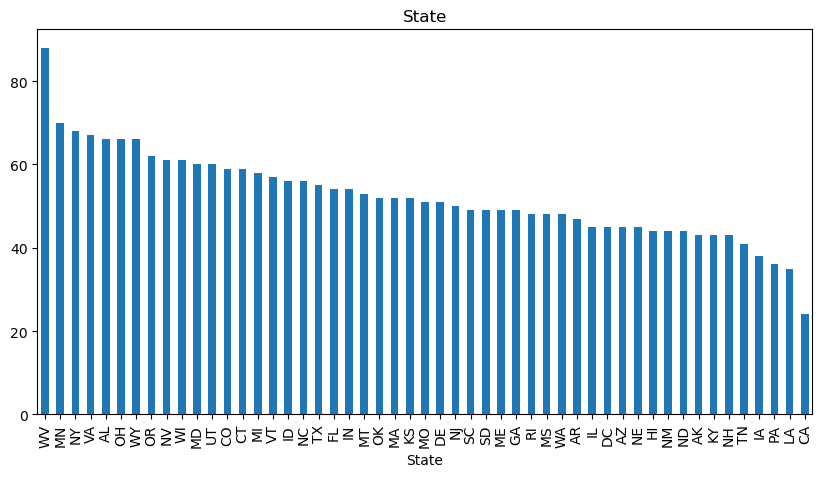

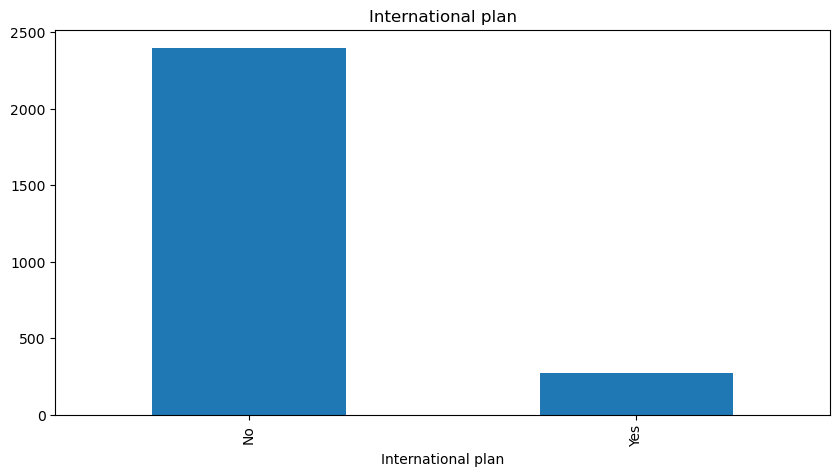

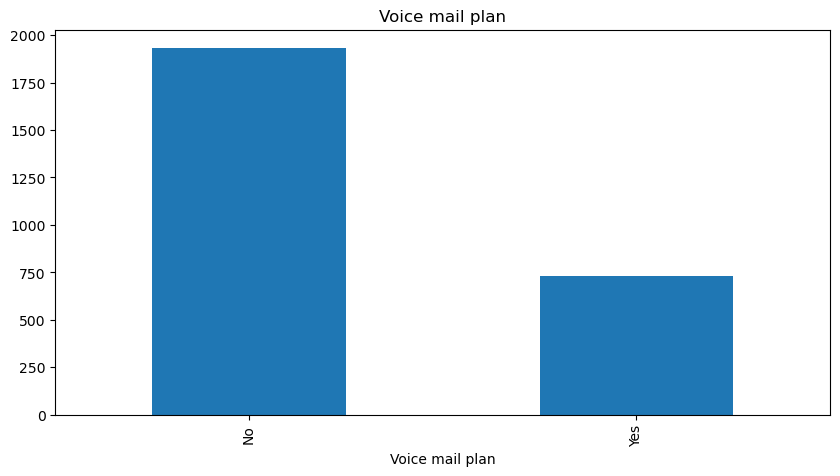

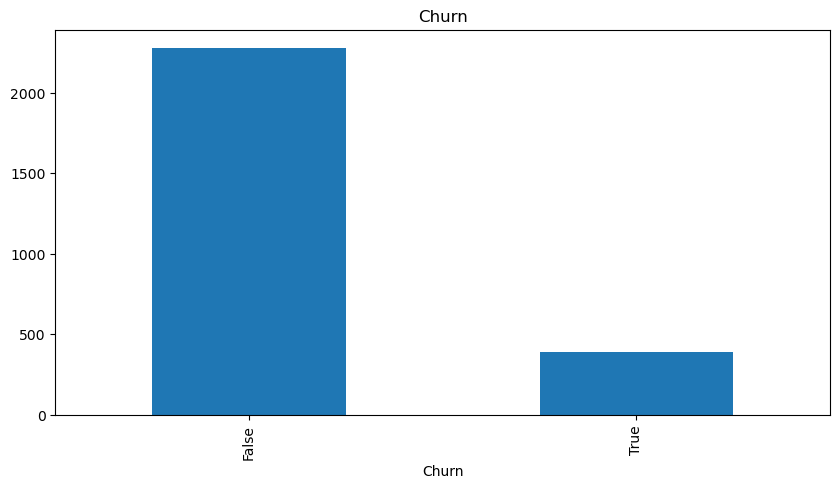

In [6]:
eda.non_numeric_columns()

These non-numerical data are imbalanced, especially the target feature distribution - Churn. During the model-building process, I will implement SMOTE for oversampling to deal with this situation.

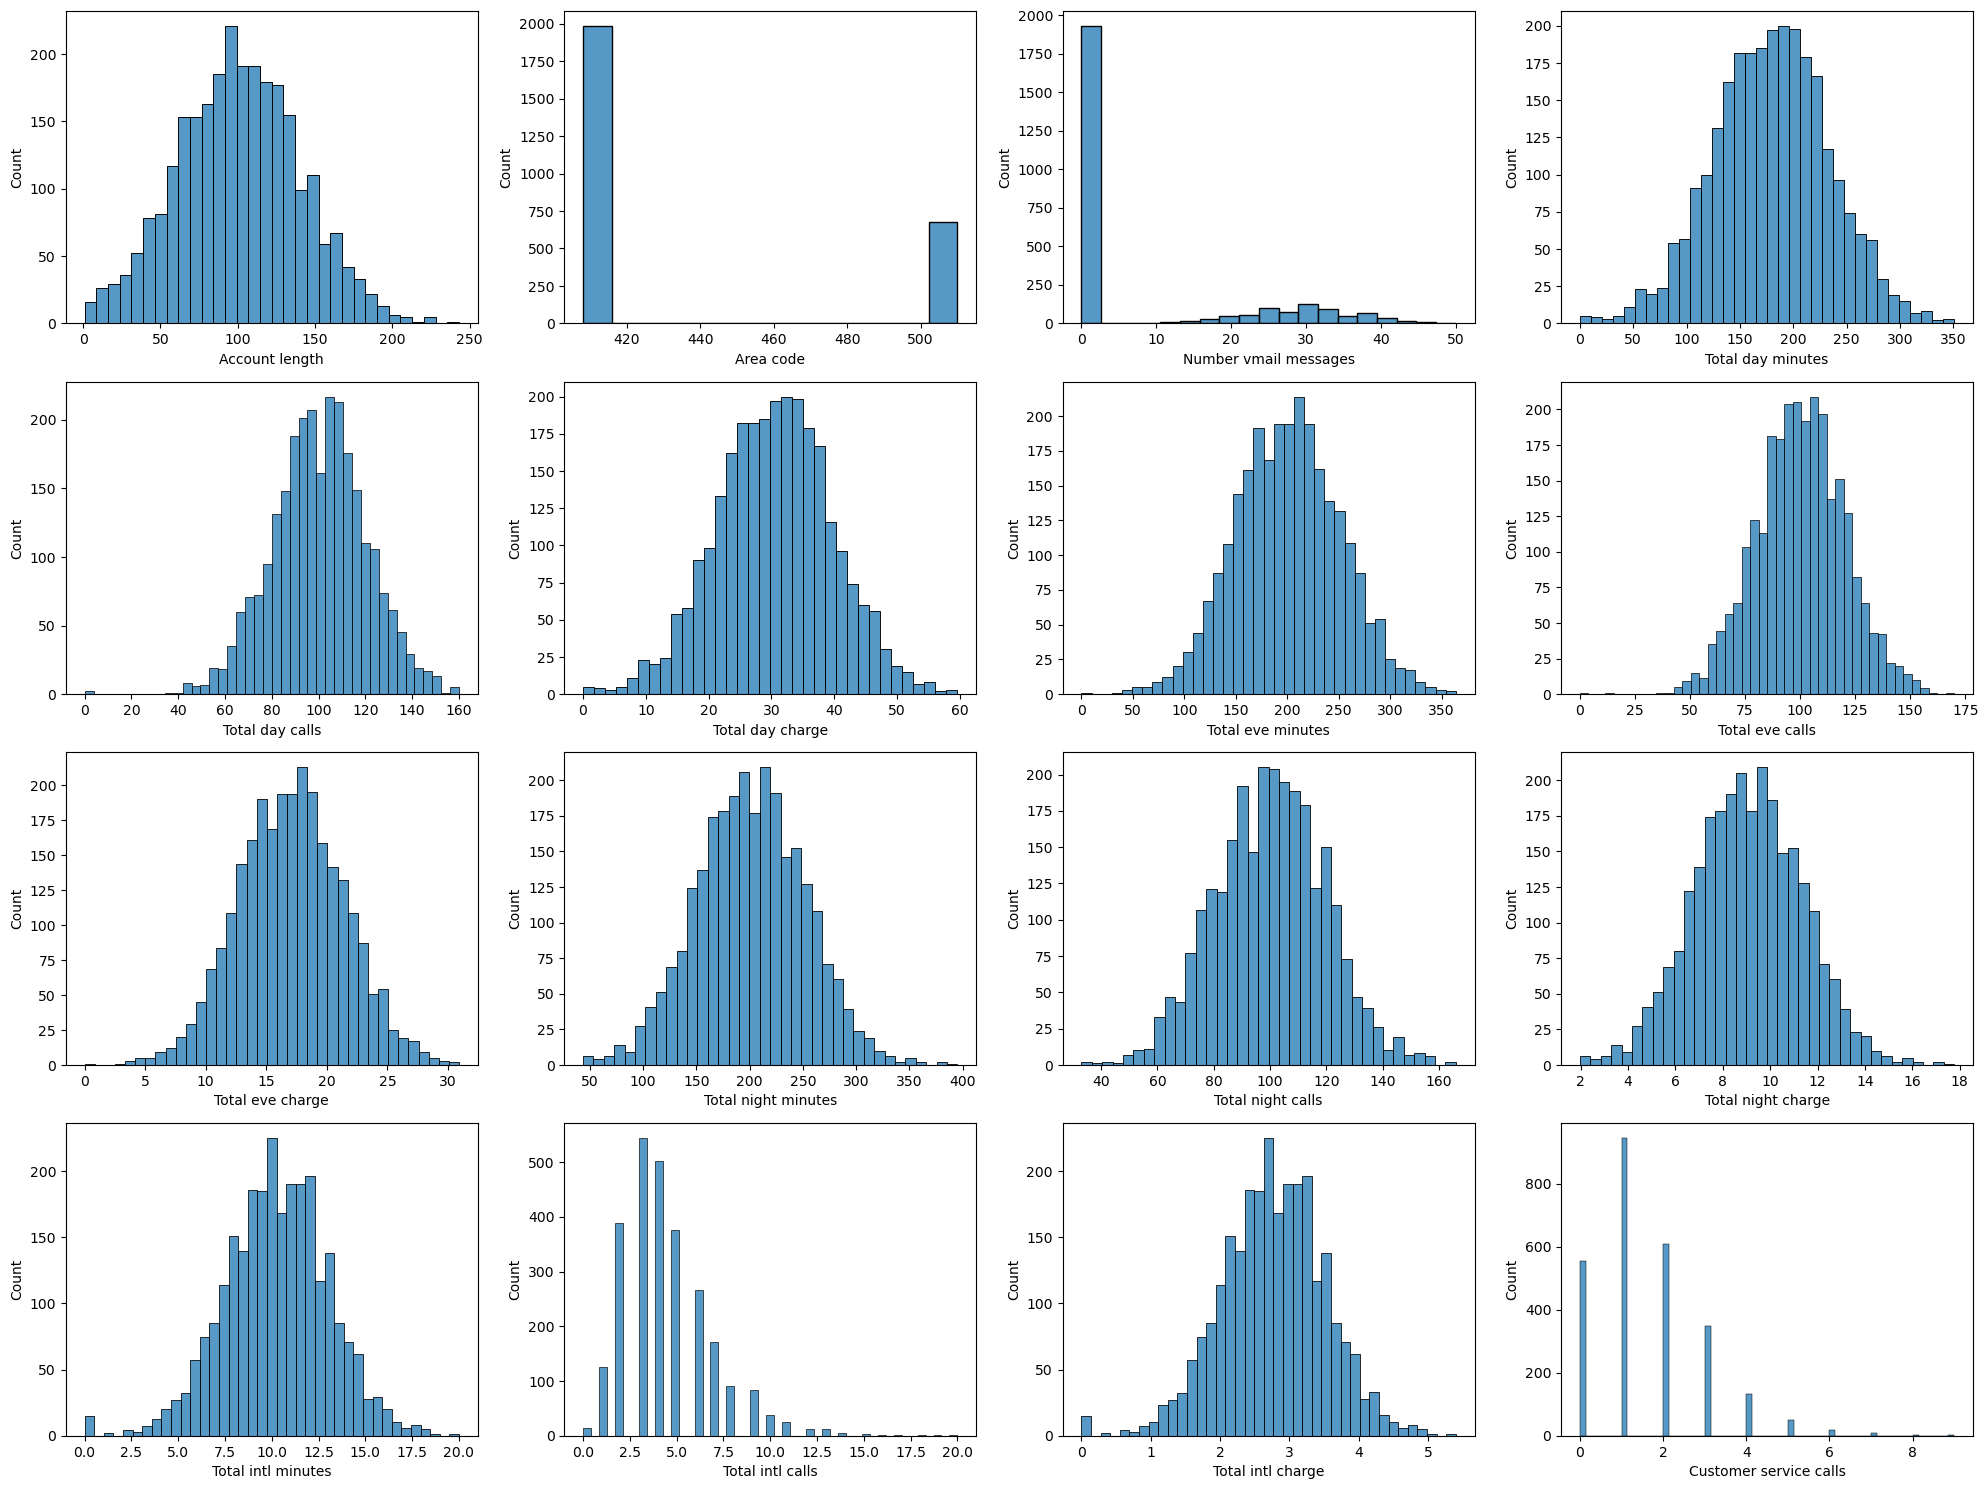

In [7]:
eda.numeric_columns()

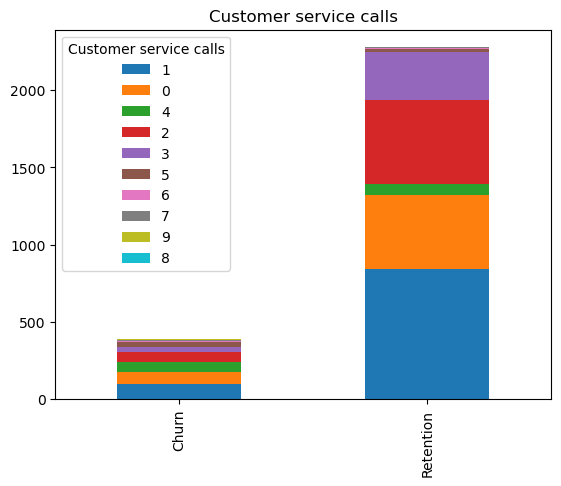

In [8]:
eda.churn_rate('Customer service calls')

50% of the customers who called the company from 2 times and more are classified as Churn.

# Data Preprocessing & Correlation

In [56]:
dataset = df.copy()
     
he = ce.HashingEncoder(cols='State')
dataset_hash = he.fit_transform(dataset)
     
dataset_hash.Churn = dataset_hash.Churn.map({False:0,True:1})
dataset_hash['International plan'] = dataset_hash['International plan'].map({"No":0,"Yes":1})
dataset_hash['Voice mail plan'] = dataset_hash['Voice mail plan'].map({"No":0,"Yes":1})

dataset_hash

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Account length,Area code,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0,1,0,0,0,0,0,0,128,415,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,0,0,0,1,0,0,0,107,415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,1,0,0,0,0,0,0,137,415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,0,0,0,1,0,0,0,84,408,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0,0,0,0,1,0,0,0,75,415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0,0,0,0,0,1,0,0,79,415,...,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,0,0,0,0,0,0,1,0,192,415,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,0,0,0,0,0,0,1,0,68,415,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,0,0,1,0,0,0,0,0,28,510,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [59]:
class Correlation():
    def __init__(self, data):
        self.data = data

    def view(self):
        # View correlation
        corr = self.data.corr()
        return corr.style.background_gradient(cmap = 'YlOrRd')

correlation = Correlation(dataset_hash)

In [74]:
correlation.view()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
col_0,1.000000,-0.199280,-0.124878,-0.164213,-0.197385,-0.111441,-0.195484,-0.144111,0.024855,-0.018184,0.000113,0.029145,0.027840,0.007383,0.000719,0.007383,0.013942,0.006718,0.013929,0.009167,-0.043255,0.009208,-0.017601,-0.005949,-0.017661,0.013967,-0.038880
col_1,-0.199280,1.000000,-0.124540,-0.163769,-0.196851,-0.111140,-0.194956,-0.143722,0.001295,-0.033688,-0.002553,-0.001186,0.003512,0.061203,0.004436,0.061205,-0.015544,0.007583,-0.015545,-0.017052,0.009563,-0.017075,0.034745,0.011674,0.034821,0.016397,0.050547
col_2,-0.124878,-0.124540,1.000000,-0.102625,-0.123356,-0.069645,-0.122168,-0.090063,-0.013164,0.005117,-0.021812,-0.009934,-0.020122,-0.027076,-0.012159,-0.027077,0.025256,-0.041473,0.025264,-0.000174,0.038285,-0.000189,-0.005631,0.008722,-0.005647,-0.016108,-0.004468
col_3,-0.164213,-0.163769,-0.102625,1.000000,-0.162212,-0.091583,-0.160650,-0.118431,0.024033,0.028400,0.030329,-0.010790,-0.010720,-0.002850,0.017435,-0.002845,0.031347,0.016356,0.031360,0.014938,0.001155,0.014926,0.003144,-0.018949,0.003167,0.017363,-0.003730
col_4,-0.197385,-0.196851,-0.123356,-0.162212,1.000000,-0.110083,-0.193102,-0.142355,0.003852,0.001936,0.020004,0.007729,0.004068,0.020242,-0.000302,0.020242,0.015206,0.016805,0.015220,0.038430,0.007781,0.038423,0.006407,-0.016247,0.006415,-0.022260,0.019262
col_5,-0.111441,-0.111140,-0.069645,-0.091583,-0.110083,1.000000,-0.109023,-0.080372,-0.026534,-0.013024,-0.009529,-0.003190,-0.000868,-0.042079,0.005007,-0.042081,0.010050,-0.007031,0.010046,-0.010433,0.006374,-0.010422,-0.015406,-0.016861,-0.015437,-0.009474,0.046661
col_6,-0.195484,-0.194956,-0.122168,-0.160650,-0.193102,-0.109023,1.000000,-0.140984,-0.014298,-0.005115,-0.038425,-0.008412,-0.000549,-0.033234,-0.010572,-0.033239,-0.076598,-0.028391,-0.076608,-0.016034,0.005556,-0.016033,0.005078,0.032024,0.005021,0.010280,-0.050096
col_7,-0.144111,-0.143722,-0.090063,-0.118431,-0.142355,-0.080372,-0.140984,1.000000,-0.013888,0.044528,0.019498,-0.011538,-0.014011,-0.010190,-0.005454,-0.010188,0.013824,0.020522,0.013820,-0.026467,-0.014200,-0.026465,-0.022388,-0.000162,-0.022333,-0.020793,-0.005571
Account length,0.024855,0.001295,-0.013164,0.024033,0.003852,-0.026534,-0.014298,-0.013888,1.000000,-0.008620,0.024500,0.002448,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,0.017728
Area code,-0.018184,-0.033688,0.005117,0.028400,0.001936,-0.013024,-0.005115,0.044528,-0.008620,1.000000,0.047099,0.007180,-0.000584,-0.023134,-0.009629,-0.023130,0.000679,-0.018602,0.000707,-0.003353,0.011455,-0.003382,-0.013418,-0.027423,-0.013534,0.034442,0.001019


The result of this Correlation Matrix means that there is not much redundant or superfluous data in our training set. The highly-correlated column are all understandable. Therefore, I will not remove any column. 

# Model Analysis

In [67]:
class MachineLearning():
    def __init__(self, data, test_classes):
        self.data = data
        self.test_classes = test_classes
        
    def models(self):
        # importing Classification models from libraries
        from sklearn.svm import SVC
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.ensemble import RandomForestClassifier
        from xgboost import XGBClassifier

        from sklearn.model_selection import train_test_split
        from imblearn.over_sampling import SMOTE, SVMSMOTE

        from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
        from sklearn.metrics import confusion_matrix, classification_report

        # one-hot encoding
        X, y = dataset.drop(self.test_classes, axis=1), dataset[[self.test_classes]] 
        X = pd.get_dummies(X, drop_first=True)
        
        # using SMOTE for oversampling imbalanced data
        sm = SMOTE(random_state=42)
        X, y = sm.fit_resample(X, y)
        
        # split train, test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        KN = KNeighborsClassifier()
        SVC = SVC() 
        D = DecisionTreeClassifier()
        R = RandomForestClassifier()
        XGB = XGBClassifier()

        # all Classification models
        models = [KN, SVC, D, R, XGB]
        model_names = ['KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier']

        accuracy_scored = []
        precision_scored = []
        recall_scored = []
        f1_scored = []

        for model in models:
            # fit the model with the training data
            model.fit(X_train, y_train.values.ravel())
            y_pred = model.predict(X_test)
            
            # measure the prediction
            accuracy_scored.append(accuracy_score(y_test, y_pred))
            precision_scored.append(precision_score(y_test, y_pred))
            recall_scored.append(recall_score(y_test, y_pred))
            f1_scored.append(f1_score(y_test, y_pred))

        # record and plot results
        result = pd.DataFrame(columns=['f1_score', 'recall_score', 'precision_score', 'accuracy_score'], index = model_names)
        result['f1_score'] = f1_scored
        result['recall_score'] = recall_scored
        result['precision_score'] = precision_scored
        result['accuracy_score'] = accuracy_scored
        
        return result.sort_values('accuracy_score', ascending=False)
    
machine_learning = MachineLearning(dataset_hash, "Churn")

In [68]:
# call model function and see results in a Dataframe
machine_learning.models()

,f1_score,recall_score,precision_score,accuracy_score
XGBClassifier,0.967742,0.973558,0.961995,0.970395
RandomForestClassifier,0.947867,0.961538,0.934579,0.951754
DecisionTreeClassifier,0.907583,0.920673,0.894860,0.914474
KNeighborsClassifier,0.826531,0.973558,0.718085,0.813596
SVC,0.585507,0.485577,0.737226,0.686404


# Conclusion

The model did a good job of predicting churn. Among all the models built, XGBClassifier produced the highest scores:

- Accuracy: 97% labeled correctly
- Precision: 96% labeled as churn actually churned 
- Recall: 97% that actually churned were labeled as churn
- F1-score: 97%

The runner-up is RandomForestClassifier.